## Intro
- This report provides:
>- a brief description of the ***StructuralWorkbook.xlsx*** file (Sections)
>- The following sections are named after the Excel tab names
- Inside each excel, there is a READ_ME tab, describing the rest tabs

___
# 0. Tags
Every tab includes boxes with **bold outer lines**, with provided details on the top. Each of these **boxes** has a colored heading of the corresponding code (*CORAL, hGAST, HAWC2, BeamDyn, NASA*) and it is labeled on the top left with 1 of the 3 following tags: 
- red `RAW`: raw-unprocessed data (copy-paste from other sources)
- green `PROCESS`: processed data  
- orange `COPY`: copied data from anoter tab in excel	

===============================================================================

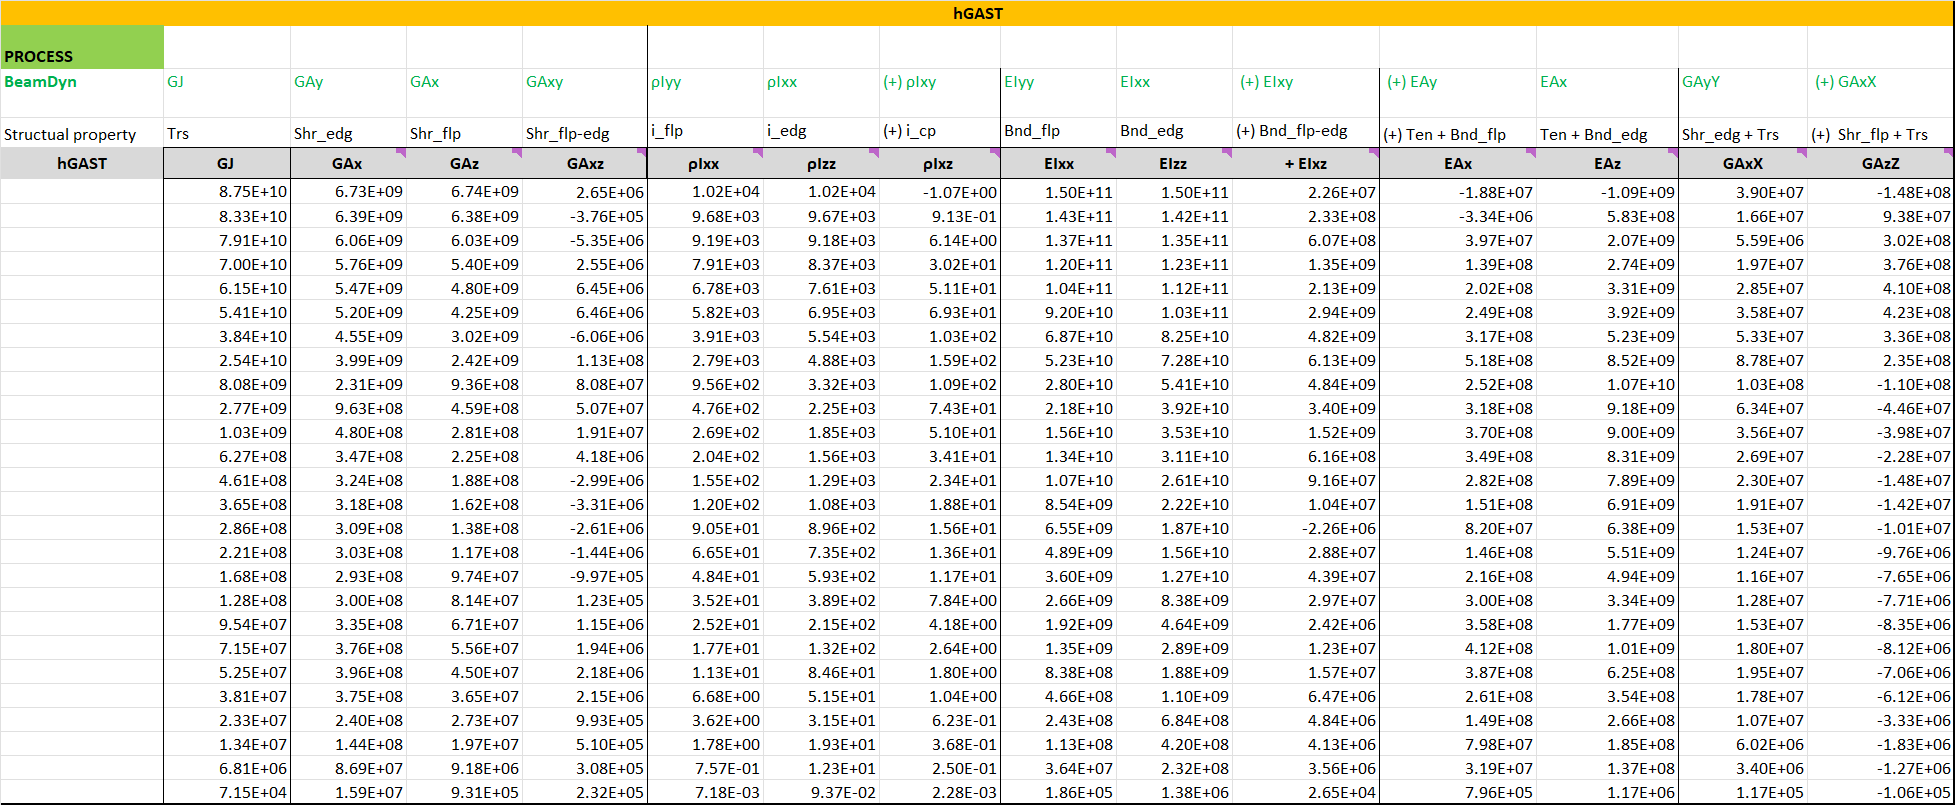

===============================================================================

___
# 1. `<Code>` tabs

[$\checkmark$] `<Code>`: commercial codes (i.e. `NASA`, `HAWC2`, `BeamDyn`)

In these tabs, we find:
- raw data of `HAWC2` standard structural properties (noFPM) calculated **@ elastic center** and rotated about the **principal bending axes** of the **local** cross-section coo (see ***Appendix A.1. HAWC2***)
>   - noFPM structural properties, after being processed, they are compared with the fully-populated matrix (FPM) elements
- IEA raw mass & stiffness matrix, based on OpenFAST/`BeamDyn` format, expressed **@ pitch axis** in the **local** cross-section coo (see ***Appendix A.2. BeamDyn***)
- `NASA` raw structural data

___
# 2. `<Code1>_2_<Code2>` tabs

[$\checkmark$]  `<Code1>`: commercial codes (i.e. `NASA`, `HAWC2`, `BeamDyn`) <br>
[$\checkmark$]  `<Code2>`: in-house codes (i.e. `CORAL`, `hGAST`)

In these tabs, from left to right, we find: 
1. manufacturer raw data
>- `IEA RWT`  raw data from the "Blade Geometry" sheet 
>>- in `HAWC2`, the IEA box is used to cross-check chord, $x_{c/2}$
>>- in `BeamDyn`, the IEA box is used for twist, prebend etc 
>- `NASA` raw data from reports
2. interpolations between input files of `<Code1>` (e.g. `ae.dat`, `c2_def` with `noFPM` of `HAWC2`) in order to match the corresponding span stations of  data 
3. structural properties raw data of blade model 
4. coordinates of mass $cg$, shear $sh$, elastic $e$ centers wrt to pitch axis and expressed in local and global-blade-fixed coordinate system (*coo*) of `<Code1>` and `<Code2>`
>- `HAWC2`: centers wrt LOCAL $c/2$ coo. Note:$x_{c/2}$ in `c2_def`, half-chord data are defined wrt to GLOBAL pitch axis, so if the LOCAL x-coordinate of centers in `FPM` are simply added to half-chord ($x_{cg,sh,e} \  + \  x_{c/2}$), they are expressed wrt to LOCAL pitch axis
>- `BeamDyn`: centers wrt LOCAL pitch axis coo
>- `NASA`: *HVAB* centers wrt GLOBAL pitch axis coo
5. structural properties expressed wrt `<Code1>` LOCAL pitch axis by applying axes rotation and Steiner theorem (optional)
6. structural properties expressed in the `<Code2>` GLOBAL-BLADE FIXED COO "Method 1" 
>- "Method 2" of axes rotation, to check the "Method 1" results 
>>💡 both methods lie on the stiffness matrix rotation
>- "Direct Method", where the coupling terms are calculated directly from GLOBAL-BLADE FIXED COO
7. interpolation of processed `<Code2>` properties on user-selected structural grid 

___
# 3. `vs/frm(t)/diff/EXI` tabs
- `vs`: codes data comparison
- `frm(t)`: structural properties input file format (i.e. beam.str, machi.inp)
- `diff`: differences between processed `<Code2>` properties
- `EXI`: existing beam model

<br><br><br><br><br><br>
<hr style="height:2px; border:none; background-color:black;">

In [125]:
'''commands for jupyter Home Page Terminal in order to convert the included images into 
embedded images, enabling the user to open them correctly in the notebook from all folders'''
# jupyter nbconvert StructuralWorkbook_Report.ipynb --to notebook --EmbedImagesPreprocessor.embed_images=True --output StructuralWorkbook_Report_embedded.ipynb
# jupyter nbconvert StructuralWorkbook_Report_embedded.ipynb --to html --HTMLExporter.embed_images=True

'commands for jupyter Home Page Terminal in order to convert the included images into \nembedded images, enabling the user to open them correctly in the notebook from all folders'

In [126]:
from sympy import *
from myst_nb import glue
from IPython.display import display, Math, HTML, Latex

G, Gx, Gy, Gz, Gxy, Gxz =  symbols('G, G_x, G_y, G_z, G_xy, G_xz')
GA, GAx, GAy, GAxy, GAz, GAxz = symbols('GA, GA_x, GA_y, GA_xy, GA_z, GA_xz')
E, EA,  EAx, EAy, EAz = symbols('E, EA,  EA_x, EA_y, EA_z')
GAxx, GAyy, GAzz = symbols('GA_{x}X, GA_{y}Y, GA_{z}Z')
EIxx, EIxy, EIyy, EIxz, EIzz, GJ = symbols('EI_xx, EI_xy, EI_yy, EI_xz, EI_zz, GJ')
Ixx, Ixy, Iyy, Ixz, Izz, J = symbols('I_xx, I_xy, I_yy, I_xz, I_zz, J')
σ_zz, σ_zx, σ_zy, σ_yz, σ_yx, σ_yy = symbols('σ_zz, σ_zx, σ_zy, σ_yz, σ_yx, σ_yy')
ε_zz, γ_zx, γ_zy, γ_yz, γ_yx, ε_yy = symbols('ε_zz, γ_zx, γ_zy, γ_yz, γ_yx, ε_yy')
u, v, w, x, y, z, A = symbols('u, v, w, x, y, z, A')
θx, θy, θz, θt, θ = symbols('θ_x, θ_y, θ_z, θ_t, θ')
min_θz = symbols('-θ_z')

# Rotation matrices (active rotation)
thita = θ
Rx = Matrix([[1,  0 ,          0],
             [0, cos(thita), -sin(thita)],
             [0, sin(thita),  cos(thita)]])

Ry = Matrix([[cos(thita), 0,  sin(thita)],
             [0,          1,     0],
             [-sin(thita),0,  cos(thita)]])

Rz = Matrix([[cos(thita), -sin(thita), 0],
             [sin(thita), cos(thita),  0],
             [0,       0,              1]])

<br><br><br>

# Appendices

<hr style="height:2px; border:none; background-color:black;">

# A. Stiffness matrix derivation

___

## A.1. HAWC2
Manual: <br>
https://tools.windenergy.dtu.dk/HAWC2/downloads/13.1.0/manual/How2HAWC2.pdf

### Coordinate system: 
- orthogonal, forming right-handed coordinate system (coo)
- r is curved length of c/2 line, NOT straight span
- twist angle positive around z axis, sign oppposite to traditional notation for pitch angle 

<!-- <table>
<tr> -->
<!-- <td><img src="./images/hawc2_c2def_coo.jpeg"></td> -->
<!-- <td><img src="./images/hawc2_WT_coo.jpeg"></td>
</tr>
</table>    -->

<div style="display:flex; justify-content:center; gap:20px;">
  <div style="text-align:center; width:45%;">
    <img src="images/hawc2_c2def_coo.jpeg" style="width:100%;">
    <p style="font-size:90%">(a) airfoil c2_def coordinate system related to main body coordinates.Blade z-coordinate positive from root towards the tip</p>
  </div>
  <div style="text-align:center; width:40%;">
    <img src="images/hawc2_WT_coo.jpeg" style="width:100%;">
    <p style="font-size:90%">(b) WT coordinate systems</p>
  </div>
</div>


### Structural properties
- cross sectional stiffness matrix is related to c2 coo and is given @ elastic center rotated along the principal bending axes [p.25]
- local frame [p.23]
- centers given relative to c/2 [p.25]

#### Stiffness matrix

<div style="display:flex; justify-content:center; gap:20px;">
  <div style="text-align:center; width:45%;">
    <img src="images/hawc2_intfoil_coo.png" style="width:50%;">
  <p style="font-size:90%">(a) Infitesimal element of airfoil with positive coordinates</p>
  </div>
  <div style="text-align:center; width:45%;">
    <img src="images/hawc2_c2def_principal_coo.jpeg" style="width:100%;">
    <p style="font-size:90%">(b) airfoil local c2def coordinate system</p>
  </div>
</div>

In [127]:
stress = Matrix([[σ_zz, σ_zx, σ_zy]]).T
elastic_tensor = Matrix([[E,0,0], [0,Gx,0], [0,0,Gy]])
strain = Matrix([[ε_zz, γ_zx, γ_zy]]).T

'''analytical expression of stress'''
stress_anal = expand(      # expand calculations
elastic_tensor@strain      # matrix mul
.subs({                    # substitute
ε_zz: w + y*θx - x*θy, # i=0
γ_zx: u - y*θz,        # i=1
γ_zy: v + x*θz}))      # i=2

f_x = stress_anal[1] * A    # forces integrated in area A
f_y = stress_anal[2] * A 
f_z = stress_anal[0] * A

m_x = stress_anal[0] * y * A      # moments integrated in area A
m_y = - stress_anal[0] * x * A
m_z = (stress_anal[2]*x - stress_anal[1]*y) * A


load = Matrix([f_x, f_y, f_z, m_x, m_y, m_z])
dofs = [u, v, w, θx, θy, θz]

K_mat = Matrix.zeros(6, 6)  # 6x6 stiffness matrix

for i, expr in enumerate(load):
    expr_exp = expand(expr)
    for j, dof in enumerate(dofs):
        # collect coefficient of the current DoF
        coeff = expr_exp.coeff(dof)
        K_mat[i, j] = coeff

# stiffness matrix 
K_hawc2=K_mat.subs({            # subtitute structural properties                                 
    E*A:EA, E*A*y:EAx, E*A*x:EAy, E*A*x**2:EIyy, E*A*y**2:EIxx, E*A*x*y:EIxy,
    Gx*A:GAx, Gy*A:GAy, Gx*A*y:GAxx, Gy*A*x:GAyy, Gy*A*x**2+ Gx*A*y**2:GJ})

display(Math(r"K_{hawc2}="+latex(K_mat))) 
display(Math(r"K_{hawc2}="+latex(K_hawc2))) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [128]:
# FPM matrix
K_HAWC2 = Matrix([ [GAx, GAxy, 0, 0, 0, -GAxx],
                   [GAxy, GAy, 0, 0, 0, GAyy], 
                   [0, 0, EA,   EAx, -EAy, 0 ],
                   [0, 0, EAx,  EIxx, -EIxy, 0], 
                   [0, 0, -EAy, -EIxy, EIyy, 0], 
                   [-GAxx, GAyy, 0, 0, 0, GJ]   ])
display(Math(r"K_{HAWC2}="+latex(K_HAWC2))) 

<IPython.core.display.Math object>

In [129]:
# replace θ with -θz in following equations

T = Matrix([ [Rz.T,       zeros(3)],
             [zeros(3), Rz.T ]])

T = T.replace(thita, θz)
Kt = trigsimp(expand(T@K_HAWC2@T.T))
display(Math(r"T(θ_z)="+latex(T)+'\n')) 
display(Math(r"K'_{hawc2}=T(θ_z)\cdot K_{hawc2} \cdot T^T(θ_z)"+'\n'))
display(Math(r"K'_{hawc2}="+latex(Kt)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

___

## A.2 BeamDyn
Manual: <br>
https://www.nrel.gov/docs/libraries/wind-docs/beamdyn_manual.pdf?sfvrsn=b5f0a6e3_3

### Coordinate system: 
- orthogonal, forming right-handed coordinate system
- z is curved length of pitch axis, NOT straight span
    
<!-- <table>
<tr>
<td><img src="./images/BeamDyn_foil_coo.jpeg"></td>
<td><img src="./images/BeamDyn_WT_coo.jpeg"></td>
</tr>
</table>    -->
<div style="display:flex; justify-content:center; gap:20px;">
  <div style="text-align:center; width:45%;">
    <img src="images/BeamDyn_foil_coo.jpeg" style="width:100%;">
    <p style="font-size:90%">(a) Cross Section View (Looking Toward the Tip, from the Root)</p>
  </div>
  <div style="text-align:center; width:45%;">
    <img src="images/BeamDyn_WT_coo.jpeg" style="width:100%;">
    <p style="font-size:90%">(b) BeamDyn Blade Geometry- Top: Side View</p>
  </div>
</div>

### Structural properties
- cross sectional stiffness matrix is given @ pitch axis [p.16]
- local frame [p.16]
- Steiner theorem applied wrt HAWC2 data

#### Stiffness matrix
<!-- <table>
<tr>
<td><img src="./images/beamdyn_intfoil_coo.png"></td>
<td><img src="./images/BeamDyn_stiff_mat.jpeg"></td>
</tr>
</table>    -->
<div style="display:flex; justify-content:center; gap:20px;">
  <div style="text-align:center; width:45%;">
    <img src="images/beamdyn_intfoil_coo.png" style="width:60%;">
    <p style="font-size:90%">(a) Infitesimal element of airfoil with positive coordinates</p>
  </div>
  <div style="text-align:center; width:45%;">
    <img src="images/BeamDyn_stiff_mat.jpeg" style="width:100%;">
    <p style="font-size:90%">(b) Stiffness matrix</p>
  </div>
</div>

In [130]:
stress = Matrix([[σ_zz, σ_zx, σ_zy]]).T
elastic_tensor = Matrix([[E,0,0], [0,Gx,0], [0,0,Gy]])
strain = Matrix([[ε_zz, γ_zx, γ_zy]]).T

'''analytical expression of stress'''
stress_anal = expand(      # expand calculations
elastic_tensor@strain      # matrix mul
.subs({                    # substitute
ε_zz: w + y*θx - x*θy, # i=0
γ_zx: u - y*θz,        # i=1
γ_zy: v + x*θz}))      # i=2

f_x = stress_anal[1] * A 
f_y = stress_anal[2] * A 
f_z = stress_anal[0] * A

m_x = stress_anal[0] * y * A
m_y = - stress_anal[0] * x * A
m_z = (stress_anal[2]*x - stress_anal[1]*y) * A


load = Matrix([f_x, f_y, f_z, m_x, m_y, m_z])
dofs = [u, v, w, θx, θy, θz]

K_mat = Matrix.zeros(6, 6)  # 6x6 stiffness matrix

for i, expr in enumerate(load):
    expr_exp = expand(expr)
    for j, dof in enumerate(dofs):
        # collect coefficient of the current DoF
        coeff = expr_exp.coeff(dof)
        K_mat[i, j] = coeff

K_beamdyn=K_mat.subs({
    E*A:EA, E*A*y:EAx, E*A*x:EAy, E*A*x**2:EIyy, E*A*y**2:EIxx, E*A*x*y:EIxy,
    Gx*A:GAx, Gy*A:GAy, Gx*A*y:GAxx, Gy*A*x:GAyy, Gy*A*x**2+ Gx*A*y**2:GJ})

display(Math(r"K_{BeamDyn}="+latex(K_mat))) 
display(Math(r"K_{BeamDyn}="+latex(K_beamdyn))) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

___

## A.3 hGAST
Thesis: <br>
https://freader.ekt.gr/eadd/index.php?doc=37152&lang=el

### Coordinate system: 
- orthogonal, forming right-handed coordinate system
- y is curved length of pitch axis, NOT straight span
- twist angle sign follows with traditional notation for pitch angle (towards wind)
    
<!-- <table>
<tr>
<td><img src="./images/hgast_foil_coo.jpeg"></td>
<td><img src="./images/hgast_WT_coo.jpeg"></td>
</tr>
</table>    -->

<div style="display:flex; justify-content:center; gap:20px;">
  <div style="text-align:center; width:45%;">
    <img src="images/hgast_foil_coo.jpeg" style="width:100%;">
    <p style="font-size:90%">(a) Airfoil coordinate system</p>
  </div>
  <div style="text-align:center; width:45%;">
    <img src="images/hgast_WT_coo.jpeg" style="width:100%;">
    <p style="font-size:90%">(b) WT coordinate system</p>
  </div>
</div>


### Structural properties
- cross sectional stiffness matrix is given @ pitch axis, local system
- twisted frame 


#### Stiffness matrix
- BeamDyn **"x"** $\rightarrow$ hGAST **"z"**
- BeamDyn **"y"** $\rightarrow$  hGAST **"x"**
<!-- <table>
<tr>
<td style="text-align:center;">
  <strong>hGAST</strong><br>
  <img src="./images/hgast_intfoil_coo.png" width="70%">
</td>
<td style="text-align:center;">
  <strong>BeamDyn</strong><br>
  <img src="./images/beamdyn_intfoil_coo.png" width="70%">
</td>
</tr>
</table> -->

<div style="display:flex; justify-content:center; gap:20px;">
  <div style="text-align:center; width:45%;">
    <img src="images/hgast_intfoil_coo.png" style="width:90%;">
    <p style="font-size:90%">(a) <strong>hGAST</strong></p>
  </div>
  <div style="text-align:center; width:45%;">
    <img src="images/beamdyn_intfoil_coo.png" style="width:90%;">
    <p style="font-size:90%">(b) <strong>BeamDyn</strong></p>
  </div>
</div>

In [131]:
stress = Matrix([[σ_yy, σ_yx, σ_yz]]).T
elastic_tensor = Matrix([[E,0,0], [0,Gx,0], [0,0,Gz]])
strain = Matrix([[ε_yy, γ_yx, γ_yz]]).T

'''analytical expression of stress'''
stress_anal = expand(      # expand calculations
elastic_tensor@strain      # matrix mul
.subs({                    # substitute
ε_yy: v - z*θx + x*θz, # i=0
γ_yx: u + z*θy,        # i=1
γ_yz: w - x*θy}))      # i=2

f_x = stress_anal[1] * A 
f_y = stress_anal[0] * A 
f_z = stress_anal[2] * A

m_x = -stress_anal[0] * z * A
m_y = (-stress_anal[2]*x + stress_anal[1]*z) * A   
m_z = stress_anal[0] * x * A


load = Matrix([f_x, f_y, f_z, m_x, m_y, m_z])
dofs = [u, v, w, θx, θy, θz]

K_mat = Matrix.zeros(6, 6)  # 6x6 stiffness matrix

for i, expr in enumerate(load):
    expr_exp = expand(expr)
    for j, dof in enumerate(dofs):
        # collect coefficient of the current DoF
        coeff = expr_exp.coeff(dof)
        K_mat[i, j] = coeff

K_hgast=K_mat.subs({
    E*A:EA, E*A*z:EAx, E*A*x:EAz, E*A*x**2:EIzz, E*A*z**2:EIxx, E*A*x*z:EIxz,
    Gx*A:GAx, Gz*A:GAz, Gx*A*z:GAxx, Gz*A*x:GAzz, Gz*A*x**2+ Gx*A*z**2:GJ})

display(Math(r"K_{hGAST}="+latex(K_mat))) 
display(Math(r"K_{hGAST}="+latex(K_hgast))) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [132]:
# FPM matrix
K_hGAST = Matrix([ [GAx, 0, GAxz,  0,  GAxx, 0 ],
                   [0, EA, 0,   -EAx, 0,    EAz], 
                   [GAxz, 0, GAz,  0,   -GAzz, 0],
                   [0, -EAx, 0,  EIxx, 0, -EIxz], 
                   [GAxx, 0, -GAzz, 0,    GJ,   0], 
                   [0, EAz, 0,  -EIxz, 0,   EIzz]])
display(Math(r"K_{hGAST}="+latex(K_hGAST)))
display(Math(r"K_{BeamDyn}="+latex(K_beamdyn))) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [133]:
T = Matrix([ [Ry.T ,   zeros(3)],
             [zeros(3), Ry.T ]])

T = T.replace(thita,θt)
Kt_hg = trigsimp(expand(T@K_hGAST@T.T)) 

display(Math(r"T(θ_t)="+latex(T)+'\n'))
display(Math(r"K'_{hgast}=T(θ_t)\cdot K_{hgast} \cdot T^T(θ_t)"+'\n'))
display(Math(r"K'_{hgast}="+latex(Kt_hg)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<hr style="height:2px; border:none; background-color:black;">

# B. Stiffness matrix rotation

## B.1 Direct method 
- existing approach
- direct calculation of off-diagonal terms on twisted cross section

<div style="display:flex; justify-content:center; gap:20px;">
  <div style="text-align:center; width:75%;">
    <img src="images/twisted_airfoil.png" style="width:60%;">
    <p style="font-size:90%"></p>
  </div>
</div>    


| | 
|---|
| ![](images/twisted_airfoil.png) { width=60% } | 
| (c) Twisted airfoil | 


| | 
|---|
| ![](images/twisted_airfoil.png)| 
| (c) Twisted airfoil | 


In [134]:
# Passive Rotation (rotation of axes x-z)
'''see image above: 
x: edge,      + TE
y: span,      + tip
z: flap,      + suction side
θ: twist,     + around y'''


display('Direct method')
display(Math(r"R_y^T = " + latex(Ry.T)))

x_vec = Matrix([x, y, z]) # coordinates vector

'''transpose R_y^T
   thita = - θ     '''
rot_x_vec = (Ry.T).replace(thita, -θ) @ x_vec    # passive rotation 

GAxx_dm = GAx * rot_x_vec[2]
GAzz_dm = GAz * rot_x_vec[0]

EAx_dm = EA * rot_x_vec[2]
EAz_dm = EA * rot_x_vec[0]

K_couple_dm = [GAxx_dm, -GAzz_dm, -EAx_dm, EAz_dm]

display('Rotate by -θ')
display(Math(r"GA_{x}X=GA_x \cdot z'="+latex(GAxx_dm ))) 
display(Math(r"GA_{z}Z=GA_z \cdot x'="+latex(GAzz_dm )))
display(Math(r"EA_{x}=EA \cdot z'="+latex(EAx_dm ))) 
display(Math(r"EA_{z}=EA \cdot x'="+latex(EAz_dm)))

'Direct method'

<IPython.core.display.Math object>

'Rotate by -θ'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## B.2 Stiffness Rotation method: 
- construction of stiffness matrix in local frame
- stiffness matrix rotation (signed properties)
- tip: validation of axes rotation (passive rotation) with active rotation 

Sources:
- https://engineering.purdue.edu/~ce474/Docs/Coordinate%20transformation.pdf
- https://akawut.wordpress.com/wp-content/uploads/2017/04/a-first-course-in-the-fem-5e-logan.pdf [p.99,236 of 837]

| | |
|---|---|
| ![](images/passive_rotation.png)| ![](images/hawc2_c2def_principal_coo.jpeg)|
| (a) Local_2_Global frame | (b) Principal axes |


**⚙ Proof**
$$
\begin{aligned}
&\{f\} = \left\{f_x, f_y, f_z, m_x, m_y, m_z\right\}^T \\
&\{u\} = \left\{u, v, z, θ_x, θ_y, θ_z\right\}^T \\
&[T] = \begin{bmatrix} [R]^T & [0] \\ [0] & [R]^T \end{bmatrix}, \
[R]^T = \begin{bmatrix} cosθ & sinθ \\ -sinθ & cosθ \end{bmatrix}
\end{aligned}
$$

$$\begin{aligned}
&\{F\} = [T]\cdot \{f\}\ \ \ \ &(1)\\
&\{f\} = [k]\cdot \{u\}\ \ \ \ &(2)\\
&\{F\} = [K]\cdot \{U\}\ \ \ \ &(3) \\
\end{aligned}$$

- Work equation:
$$\begin{aligned}
&\{w\} = \frac{1}{2}\{u\}^T\{f\} \\
&\{W\} = \frac{1}{2}\{U\}^T\{F\} \\\\
& \{w\} = \{W\} \Rightarrow  \\
\Rightarrow &\{u\}^T\{f\}  = \{U\}^T\{F\}  \\
\Rightarrow & \{u\}^T\{f\} = \{U\}^T [T]\cdot \{f\}\\
\Rightarrow & \{u\} = [T]^T\cdot \{U\} \ \ \ \ &(4)
\end{aligned}$$

$$\begin{aligned}
& (1)\Rightarrow \{F\} = [T]\cdot \{f\}= [T]\cdot [k]\cdot \{u\} = \underbrace{[T]\cdot [k]\cdot[T]^T}_{[K]}\cdot \{U\}\ \ \ \ &(5) \\
&(3) \Rightarrow{(5)} \ \ \ \  [K] = [T]\cdot [k]\cdot[T]^T
\end{aligned}$$

### Results 

In [135]:
# Stiffness method

T = Matrix([ [Ry.T,       zeros(3)],
             [zeros(3),   Ry.T ]])

GAx_un = GAx * x_vec[2]
GAz_un = GAz * x_vec[0]

EAx_un = EA * x_vec[2]
EAz_un = EA * x_vec[0]

K_xz = K_hGAST.subs({GAxx:GAx_un, GAzz:GAz_un, EAx:EAx_un, EAz:EAz_un})

'''rotate by -θ'''
T = T.replace(thita, -θ)
K_xzrot = trigsimp(expand(T @ K_xz @ T.T))

K_couple_sm = [K_xzrot[0,4], K_xzrot[2,4],K_xzrot[1,3], K_xzrot[1,5]]

display('Direct Method')
display(Math(r"K_{15}=GA_{x}X="+latex(K_couple_dm[0].expand()))) 
display(Math(r"K_{35}=-GA_{z}Z="+latex(K_couple_dm[1].expand())))
display(Math(r"K_{24}=-EA_{x}="+latex(K_couple_dm[2]))) 
display(Math(r"K_{26}=EA_{z}="+latex(K_couple_dm[3])))

display('Stiffness Method')
display(Math(r"K_{15}=GA_{x}X="+latex(K_couple_sm[0]))) 
display(Math(r"K_{35}=-GA_{z}Z="+latex(K_couple_sm[1])))
display(Math(r"K_{24}=-EA_{x}="+latex(K_couple_sm[2].factor()))) 
display(Math(r"K_{26}=EA_{z}="+latex(K_couple_sm[3].factor())))

'Direct Method'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'Stiffness Method'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**💡 Note**: <br>
The differences of 2 methods are very small and lie ONLY on *Shear-Torsion* coupling terms, where the $sin(θ)$-terms are multiplied with different shear factors $k_x, k_z$

Text(0.5, 1.0, '$K_{26}$')

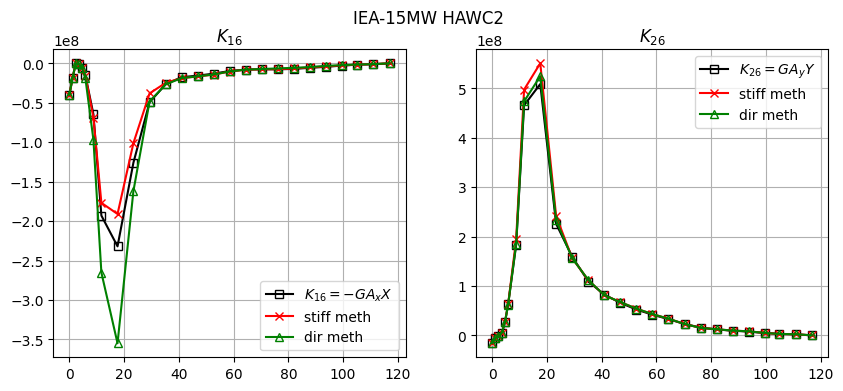

In [136]:
from numpy import *
from matplotlib.pyplot import *

'''FPM data of IEA-15MW HAWC2'''
# -GAxX
K16 = array([-4.02E+07,-1.86E+07,6.49E+04,-7.37E+05,-5.71E+06,-1.53E+07,-6.46E+07,-1.93E+08,-2.32E+08,-1.26E+08,-4.93E+07,-2.65E+07,-1.76E+07,-1.56E+07,-1.31E+07,-9.74E+06,-7.92E+06,-7.53E+06,-7.65E+06,-7.01E+06,-5.67E+06,-4.44E+06,-2.87E+06,-1.73E+06,-1.13E+06,-1.41E+04])
# GAyY
K26 = array([-1.58E+07,-4.97E+06,-1.63E+06,4.33E+06,2.67E+07,6.28E+07,1.83E+08,4.66E+08,5.09E+08,2.26E+08,1.59E+08,1.09E+08,8.28E+07,6.59E+07,5.25E+07,4.20E+07,3.31E+07,2.32E+07,1.59E+07,1.22E+07,9.58E+06,7.86E+06,4.93E+06,3.19E+06,2.31E+06,1.13E+05])

'''no FPM data of IEA-15MW HAWC2'''
r = array([0.00E+00,1.17E+00,2.34E+00,3.52E+00,4.69E+00,5.86E+00,8.79E+00,1.17E+01,1.76E+01,2.34E+01,2.93E+01,3.52E+01,4.10E+01,4.69E+01,5.27E+01,5.86E+01,6.44E+01,7.03E+01,7.62E+01,8.20E+01,8.79E+01,9.37E+01,9.96E+01,1.05E+02,1.11E+02,1.17E+02])
x_e = array([2.00E-04,8.73E-05,-7.16E-05,2.15E-02,4.52E-02,6.98E-02,1.35E-01,1.37E-01,2.28E-01,4.60E-01,5.66E-01,6.18E-01,6.07E-01,6.19E-01,6.05E-01,5.99E-01,5.68E-01,5.85E-01,6.03E-01,5.77E-01,5.25E-01,4.67E-01,3.88E-01,3.05E-01,1.85E-01,6.45E-02])
y_e = array([-4.77E-04,-4.96E-05,2.26E-03,6.89E-03,8.84E-03,1.03E-02,1.33E-02,2.08E-02,1.09E-02,1.52E-02,1.80E-02,1.63E-02,1.29E-02,6.99E-03,3.92E-03,7.30E-03,1.14E-02,1.71E-02,2.26E-02,2.93E-02,3.52E-02,3.58E-02,3.30E-02,2.99E-02,2.66E-02,6.66E-03])
x_sh = array([-1.50E-03,-1.29E-03,-3.31E-04,2.23E-02,5.08E-02,8.50E-02,2.00E-01,3.44E-01,8.09E-01,9.96E-01,1.14E+00,1.11E+00,1.05E+00,1.03E+00,9.86E-01,9.59E-01,9.08E-01,8.70E-01,8.39E-01,7.94E-01,7.36E-01,6.81E-01,5.68E-01,4.65E-01,4.36E-01,1.83E-01])
y_sh = array([5.72E-03,2.63E-03,2.19E-03,6.77E-03,8.62E-03,1.01E-02,1.43E-02,2.72E-02,4.22E-02,6.13E-02,6.89E-02,7.63E-02,7.15E-02,6.10E-02,5.00E-02,4.13E-02,3.98E-02,4.24E-02,4.54E-02,4.72E-02,4.85E-02,4.66E-02,4.44E-02,4.14E-02,3.86E-02,5.79E-03])
G = array([3.91E+09,3.84E+09,3.77E+09,3.70E+09,3.63E+09,3.57E+09,3.27E+09,2.97E+09,2.60E+09,2.04E+09,1.93E+09,2.06E+09,2.32E+09,2.58E+09,2.83E+09,3.09E+09,3.38E+09,3.70E+09,4.05E+09,4.40E+09,4.69E+09,4.97E+09,4.30E+09,3.88E+09,3.47E+09,3.90E+09])
A = array([2.41E+00,2.32E+00,2.24E+00,2.16E+00,2.06E+00,1.97E+00,1.85E+00,1.73E+00,1.24E+00,9.71E-01,8.38E-01,7.40E-01,6.59E-01,5.78E-01,5.03E-01,4.31E-01,3.69E-01,3.14E-01,2.65E-01,2.18E-01,1.65E-01,1.12E-01,8.15E-02,5.38E-02,3.44E-02,5.34E-03])
kx = array([0.71,0.72,0.72,0.72,0.73,0.74,0.75,0.78,0.72,0.49,0.30,0.23,0.21,0.21,0.22,0.23,0.23,0.26,0.31,0.39,0.51,0.67,0.68,0.69,0.73,0.76])
ky = array([0.72,0.71,0.71,0.68,0.64,0.60,0.50,0.47,0.29,0.23,0.17,0.15,0.12,0.11,0.10,0.09,0.08,0.07,0.06,0.06,0.06,0.07,0.08,0.09,0.08,0.05])
θz = array([-6.00,12.24,14.37,-18.27,-14.55,-14.74,-18.28,-16.87,-12.15,-13.15,-4.91,-1.90,0.05,0.19,0.15,0.07,0.09,0.29,0.85,0.68,0.35,0.57,0.52,0.27,0.03,-0.85]) * pi/180
# θz [rad]

# process
GA = G*A
'''shear terms @ pri coo'''
GAx = kx * GA
GAy = ky * GA
'''shear+coupling terms @ c2 coo'''
c2_GAx = 0.5*(GAx+GAy) + 0.5*(GAx-GAy)*cos(-2*θz)
c2_GAy = 0.5*(GAx+GAy) - 0.5*(GAx-GAy)*cos(-2*θz)
c2_GAxX = c2_GAx * (y_sh-y_e)
c2_GAyY = c2_GAy * (x_sh-x_e)

#---------------------------------------------------------------------------------------------------------------------

fig, ax = subplots(1,2, figsize=[10,4])
fig.suptitle('IEA-15MW HAWC2')
ax[0].plot(r, K16, 'k-s', markerfacecolor = 'none', label='$K_{16} = -GA_{x}X$')
ax[1].plot(r, K26, 'k-s', markerfacecolor = 'none', label='$K_{26} = GA_{y}Y$')

# stiffness rotation method
'''coupling terms @ pri system '''
GAxX = c2_GAxX*cos(θz) - c2_GAyY*sin(θz)
GAyY = c2_GAxX*sin(θz) + c2_GAyY*cos(θz)
ax[0].plot(r, -GAxX, 'r-x', label='stiff meth')
ax[1].plot(r, GAyY, 'r-x', label='stiff meth')

# direct method 
'''centers given @ c2 coo,
       expressed @ pri coo'''
x_off =   (x_sh-x_e)*cos(θz) + (y_sh-y_e)*sin(θz) # @ pri coo
y_off = - (x_sh-x_e)*sin(θz) + (y_sh-y_e)*cos(θz) # @ pri coo
GAxX = GAx * y_off
GAyY = GAy * x_off
ax[0].plot(r, -GAxX, 'g-^',  markerfacecolor = 'none', label="dir meth")
ax[1].plot(r, GAyY, 'g-^',  markerfacecolor = 'none', label="dir meth")

ax[0].legend()
ax[0].grid()
ax[0].set_title('$K_{16}$')

ax[1].legend()
ax[1].grid()
ax[1].set_title('$K_{26}$')


🔬 let's compare the stiffness matrix eigenvalues between the 2 methods and the initial matrix @ $R\approx17m$

In [137]:
# IEA-15MW-RWT 
# BeamDyn mapping to hGAST coo
# FPM @ R=17m
s = '''2.27E+10	8.08E+09	2.31E+09	9.36E+08	8.08E+07	2.80E+10	5.41E+10	4.84E+09	2.52E+08	1.07E+10	1.03E+08	-1.10E+08
'''
# convert space-separated string to comma-separated array
K_vector = fromstring(s, sep='\t')
K_vector

'''construction of K stiffness symmetric matrix
    from K_vector (the copied-pasted 
    line -s of excel)'''
K = zeros([6,6])
#-----------------------------# hGAST 
K[1,1] = copy(   K_vector[0]) # EA   
K[4,4] = copy(   K_vector[1]) # GJ    
K[0,0] = copy(   K_vector[2]) # GAx
K[2,2] = copy(   K_vector[3]) # GAz
K[0,2] = copy(   K_vector[4]) # GAxz   
K[2,0] = copy(   K_vector[4]) 
K[3,3] = copy(   K_vector[5]) # EIxx 
K[5,5] = copy(   K_vector[6]) # EIzz
K[3,5] = copy( - K_vector[7]) # -EIxz  
K[5,3] = copy( - K_vector[7]) 
K[1,3] = copy( - K_vector[8]) # -EAx 
K[3,1] = copy( - K_vector[8]) 
K[1,5] = copy(   K_vector[9]) # EAz  
K[5,1] = copy(   K_vector[9])
K[0,4] = copy(   K_vector[10]) # GAxX   
K[4,0] = copy(   K_vector[10]) 
K[2,4] = copy( - K_vector[11]) # -GAzZ  
K[4,2] = copy( - K_vector[11]) 

Keigvals, Keigvecs = linalg.eigh(K)


# use of eigh for SYMMETRIC matrices
Keigvals, Keigvecs = np.linalg.eigh(K)

# '''construction of K stiffness symmetric matrix
#     from K_vector (the copied-pasted 
#     line -s of excel)'''
# n = 6
# K = zeros([n,n])
# k, l = 0, 0
# for i in range(0,n):
#     for j in range(i,n):
#         el = K_vector[l]
#         K[i,j] = el
#         K[j,i] = el
#         l += 1
# #         print(i,j)

# print("Eigenvalues:")
# print(Keigvals)

# print("Eigenvectors:")
# print(Keigvecs)

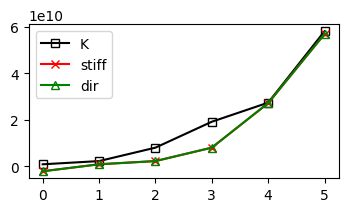

In [138]:
# Stiffness method matrix @ R=17m
s = '''2.27E+10	2.30E+09	1.05E+10	3.08E+10	5.13E+10	9.40E+09	8.08E+09	2.23E+09	1.02E+09	3.34E+08	7.95E+07	-1.28E+08
'''
K_vector = fromstring(s, sep='\t')
Ksm = zeros([6,6])
#-------------------------------# hGAST 
Ksm[2,2] = copy(   K_vector[0]) # EA       
Ksm[1,3] = copy( - K_vector[1]) # -EAx
Ksm[3,1] = copy( - K_vector[1]) 
Ksm[1,5] = copy(   K_vector[2]) # EAz 
Ksm[5,1] = copy(   K_vector[2])
Ksm[3,3] = copy(   K_vector[3]) # EIxx  
Ksm[5,5] = copy(   K_vector[4]) # EIzz
Ksm[3,5] = copy( - K_vector[5]) # -EIxz  
Ksm[5,3] = copy( - K_vector[5]) 
Ksm[4,4] = copy(   K_vector[6]) # GJ
Ksm[0,0] = copy(   K_vector[7]) # GAx
Ksm[2,2] = copy(   K_vector[8]) # GAz
Ksm[0,2] = copy(   K_vector[9]) # GAxz    
Ksm[2,0] = copy(   K_vector[9])  
Ksm[0,4] = copy(   K_vector[10]) # GAxX   
Ksm[4,0] = copy(   K_vector[10]) 
Ksm[2,4] = copy( - K_vector[11]) # -GAzZ  
Ksm[4,2] = copy( - K_vector[11]) 

Ksmeigvals, Ksmeigvecs = linalg.eigh(Ksm)


# Direct method matrix @ R=17m
s = '''2.27E+10	2.30E+09	1.05E+10	3.08E+10	5.13E+10	9.40E+09	8.08E+09	2.23E+09	1.02E+09	3.34E+08	4.68E+07	-1.26E+08
'''

K_vector = fromstring(s, sep='\t')
Kdm = zeros([6,6])
#-------------------------------# hGAST 
Kdm[2,2] = copy(   K_vector[0 ]) # EA       
Kdm[1,3] = copy( - K_vector[1 ]) # -EAx
Kdm[3,1] = copy( - K_vector[1 ]) 
Kdm[1,5] = copy(   K_vector[2 ]) # EAz 
Kdm[5,1] = copy(   K_vector[2 ])
Kdm[3,3] = copy(   K_vector[3 ]) # EIxx  
Kdm[5,5] = copy(   K_vector[4 ]) # EIzz
Kdm[3,5] = copy( - K_vector[5 ]) # -EIxz  
Kdm[5,3] = copy( - K_vector[5 ]) 
Kdm[4,4] = copy(   K_vector[6 ]) # GJ
Kdm[0,0] = copy(   K_vector[7 ]) # GAx
Kdm[2,2] = copy(   K_vector[8 ]) # GAz
Kdm[0,2] = copy(   K_vector[9 ]) # GAxz    
Kdm[2,0] = copy(   K_vector[9 ])  
Kdm[0,4] = copy(   K_vector[10]) # GAxX   
Kdm[4,0] = copy(   K_vector[10]) 
Kdm[2,4] = copy( - K_vector[11]) # -GAzZ  
Kdm[4,2] = copy( - K_vector[11]) 

Kdmeigvals, Kdmeigvecs = linalg.eigh(Kdm)

fig, ax = subplots(figsize=[4,2])
plot(Keigvals,   'k-s', markerfacecolor='none', label='K')
plot(Ksmeigvals, 'r-x', label='stiff')
plot(Kdmeigvals, 'g-^', markerfacecolor='none', label='dir')
legend()


In [139]:
# arbitary LOCAL displacement vector
u_L = mat([0.01, 0.0001, 0.5, pi/6, pi/9, pi/8]).T
# Strain Energy
U = 0.5*u_L.T @ K @ u_L 
print('U   =',U)

twist = 11.04*pi/180
Ryy = mat([[cos(twist),0,-sin(twist)],[0,1,0], [sin(twist),0,cos(twist)]])
T = block([[Ryy, zeros((3,3))], [zeros((3,3)),Ryy]])
# GLOBAL displacement vector
u_G = T @ u_L

# Stiffness method
U_sm = 0.5*u_G.T @ Ksm @ u_G
print('U_sm=', U_sm, '    diff=', (U-U_sm)/U*100)

# Direct method
U_dm = 0.5*u_G.T @ Kdm @ u_G
print('U_dm=', U_dm,'    diff=', (U-U_dm)/U*100)

U   = [[7.64419088e+09]]
U_sm= [[7.642094e+09]]     diff= [[0.02743103]]
U_dm= [[7.64273093e+09]]     diff= [[0.01909887]]
